## Notebook 1: Carregamento e apresentação dos datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

INPUT_DATA_PATH = './datas/'

In [2]:
df_animes = pd.read_csv(os.path.join(INPUT_DATA_PATH, 'animes.csv'))
df_ratings = pd.read_csv(os.path.join(INPUT_DATA_PATH, 'ratings.csv'))

In [3]:
df_animes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20237 entries, 0 to 20236
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   animeID            20237 non-null  int64 
 1   title              20237 non-null  object
 2   alternative_title  8676 non-null   object
 3   type               20237 non-null  object
 4   year               20237 non-null  object
 5   score              20237 non-null  object
 6   episodes           20237 non-null  int64 
 7   mal_url            20237 non-null  object
 8   sequel             20237 non-null  bool  
 9   image_url          20237 non-null  object
 10  genres             20237 non-null  object
 11  genres_detailed    20237 non-null  object
dtypes: bool(1), int64(2), object(9)
memory usage: 1.7+ MB


In [4]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148170496 entries, 0 to 148170495
Data columns (total 3 columns):
 #   Column   Dtype
---  ------   -----
 0   userID   int64
 1   animeID  int64
 2   rating   int64
dtypes: int64(3)
memory usage: 3.3 GB


### Conversão dos tipos dados

In [5]:
for column in ['animeID', 'episodes', 'score', 'year']:
    df_animes[column] = pd.to_numeric(df_animes[column], errors='coerce') 
df_animes.to_csv(os.path.join(INPUT_DATA_PATH, 'animes.csv'))

### Análise 1: Quantidade de Animes por Tipo (Group By)

In [6]:
# Agrupamento por tipo de anime
animes_por_tipo = df_animes.groupby('type')['animeID'].count().sort_values(ascending=False)
print(animes_por_tipo)

type
TV         5766
SPECIAL    4847
OVA        3661
MOVIE      3250
ONA        2713
Name: animeID, dtype: int64


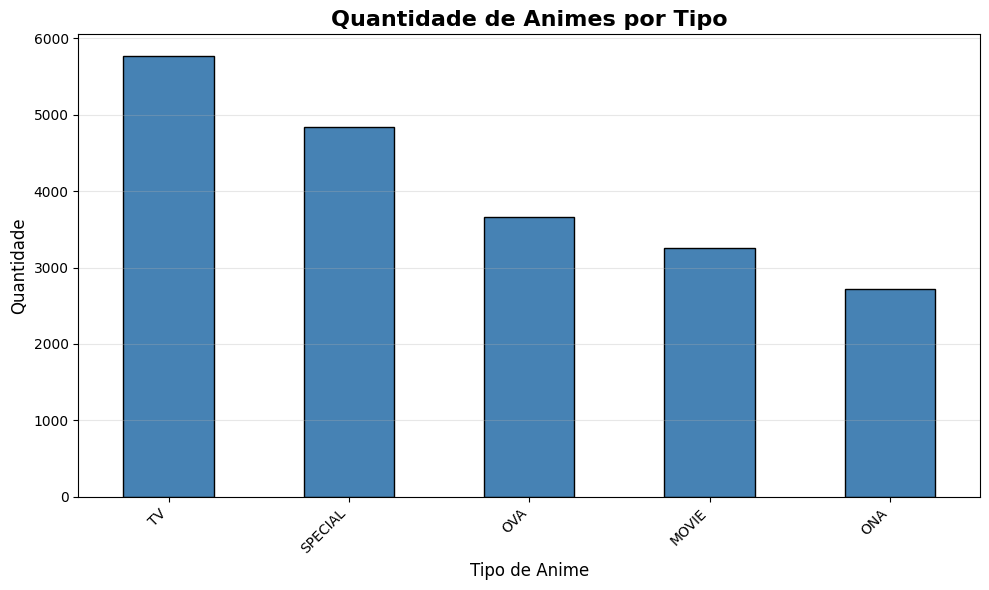

In [7]:
# Visualização em gráfico de barras
plt.figure(figsize=(10, 6))
animes_por_tipo.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Quantidade de Animes por Tipo', fontsize=16, fontweight='bold')
plt.xlabel('Tipo de Anime', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join('./outputs/', 'nb1_animes_por_tipo.png'), dpi=300, bbox_inches='tight')
plt.show()

#### Explicação do Gráfico

Este gráfico de barras nos mostra como os animes são distribuídos por tipo de mídia. É interessante notar alguns padrões:

Os **animes de TV** dominam completamente, com quase 6 mil títulos! Isso faz todo sentido quando pensamos que séries de TV são o formato tradicional de consumo de anime no Japão.

Em segundo lugar vêm os **Specials** (episódios especiais), seguidos de perto por **OVAs** (animações lançadas direto em vídeo) e **Movies** (filmes). Esses formatos alternativos também são bem populares, mostrando que a indústria sabe diversificar seus produtos.

Os **ONAs** (animações feitas diretamente para a internet) aparecem em menor quantidade, mas é um formato que vem crescendo com o streaming.

No final das contas, esse agrupamento nos mostra que a TV ainda é o rei quando se trata de anime, refletindo décadas de tradição da indústria japonesa de animação.